<h1>Práctica 5</h1>

<i>
Maximiliano Vaca Montejano <br>
364897 <br>
maximiliano.vaca@uabc.edu.mx
</i>

<i>Profesor: Andrés García Medina <br>
andres.garcia.medina@uabc.edu.mx <br>
Fecha de entrega: jueves 25 de abril, 2024 (12pm).</i>

<h2>Ejercicio 1 (50 pts)</h2>

Los datos $Oxide$ de la biblioteca $nlme$ contiene datos de control de calidad en la
industria de semiconductores. El objetivo del ejercicio es investigar las fuentes
de variabilidad en el espesor de las capas de  ́oxido en obleas de silicio. El marco
de datos contiene las siguientes columnas:

* <b>Thickness:</b> es el espesor de la capa de  ́oxido (en nanómetros, hasta donde yo sé).
* <b>Source:</b> es un factor de dos niveles que indica de cuál de los dos posibles proveedores provino la muestra.
* <b>Site:</b> es un factor de 3 niveles, que indica en cuál de los tres sitios de la oblea de silicio se midió el espesor.
* <b>Lot:</b> es una variable de factor cuyos niveles indican de qué lote particular de obleas de silicio proviene la medicion.
* <b>Wafer:</b> es una variable factor con niveles que etiquetan las obleas individuales examinadas.

Los investigadores están interesados en descubrir si existen diferencias sistemáticas entre las dos fuentes y esperan que el espesor pueda variar sistemáticamente
en los tres sitios; sólo están interesados en los lotes y obleas en la medida en que
sean representativos de una población más amplia de lotes y obleas.
Se espera su colaboración en el proyecto realizando las siguientes actividades: <br>

<ol type="a">
<li>Identifique qu ́e factores tratar ́ıa como aleatorios y cu ́ales como fijos, en un an ́alisis de modelo lineal mixto de estos datos.
<li> Escriba un modelo que pueda constituir una base adecuada para comenzar a analizar los datos.
<li> Realice un an ́alisis completo de los datos, incluida la verificaci ́on del mod- elo. Su objetivo debe ser identificar las fuentes de variabilidad del espesor en los datos y cualquier efecto fijo que cause la variabilidad del espesor. <br>Se sugiere analizar espec ́ıficamente lo siguiente:<br><br>

<ol>
<li> Graficar residuales estandarizados vs. valores ajustados.
<li> Analizar la suposici ́on de normalidad de los residuales a trav ́es de sus
cuantiles.
<li> Analizar la suposici ́on de normalidad de los efectos aleatorios a trav ́es
de sus cuantiles.
<li> Ajustar un nuevo modelo mixto sobre los datos suponiendo que la
variable Wafer representa un efecto aleatorio.
<li> Comparar su propuesta original con el modelo anterior usando la
funci ́on anova.
<li> Determinar los intervalos de confianza de los par ́ametros al 99% us-
ando la funci ́on intervals
</ol>

</ol>

<b>(a)</b> Identifique que factores trataria como aleatorios y cuales como fijos, en un analisis de modelo lineal mixto de estos datos.

In [2]:
library(nlme)
data(Oxide)

head(Oxide, 20) # 72 × 5

,Source,Lot,Wafer,Site,Thickness
,<fct>,<fct>,<fct>,<fct>,<dbl>
1,1,1,1,1,2006
2,1,1,1,2,1999
3,1,1,1,3,2007
4,1,1,2,1,1980
5,1,1,2,2,1988
6,1,1,2,3,1982
7,1,1,3,1,2000
8,1,1,3,2,1998
9,1,1,3,3,2007


* trata como fijos aquellos factores que queremos comparar directamente: $Source$ y $Site$
* y como aleatorios los que pueden afectar las mediciones pero no son de interes principal, como lo son $Lot$ y $Wafer$

<b>(b)</b> Escriba un modelo que pueda constituir una base adecuada para comenzar a analizar los datos.

In [3]:
model <- lme(Thickness ~ Source + Site, random = ~ 1 | Lot/Wafer, data = Oxide)

<b>(c)</b> Realice un an ́alisis completo de los datos, incluida la verificaci ́on del mod- elo. Su objetivo debe ser identificar las fuentes de variabilidad del espesor en los datos y cualquier efecto fijo que cause la variabilidad del espesor. <br>Se sugiere analizar espec ́ıficamente lo siguiente:<br><br>

<ol>
<li> Graficar residuales estandarizados vs. valores ajustados.
<li> Analizar la suposici ́on de normalidad de los residuales a trav ́es de sus
cuantiles.
<li> Analizar la suposici ́on de normalidad de los efectos aleatorios a trav ́es
de sus cuantiles.
<li> Ajustar un nuevo modelo mixto sobre los datos suponiendo que la
variable Wafer representa un efecto aleatorio.
<li> Comparar su propuesta original con el modelo anterior usando la
funci ́on anova.
<li> Determinar los intervalos de confianza de los par ́ametros al 99% us-
ando la funci ́on intervals
</ol>

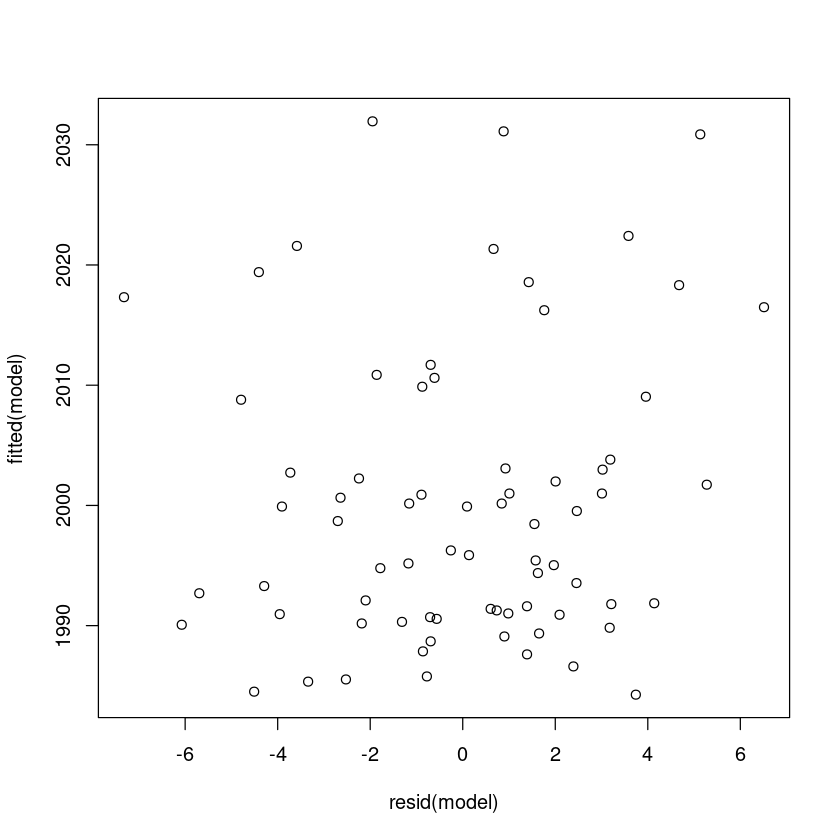

In [6]:
#residuales estandarizados vs. valores ajustados
plot(resid(model), fitted(model))

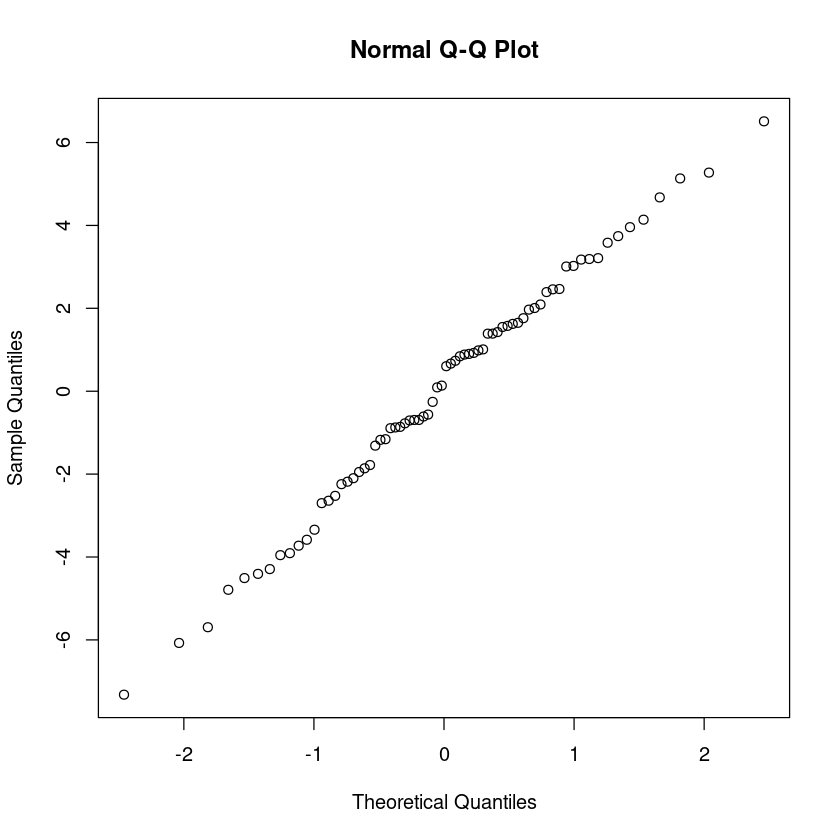

In [8]:
#analizar la suposición de normalidad de los residuales a través de sus cuantiles
qqnorm(resid(model))

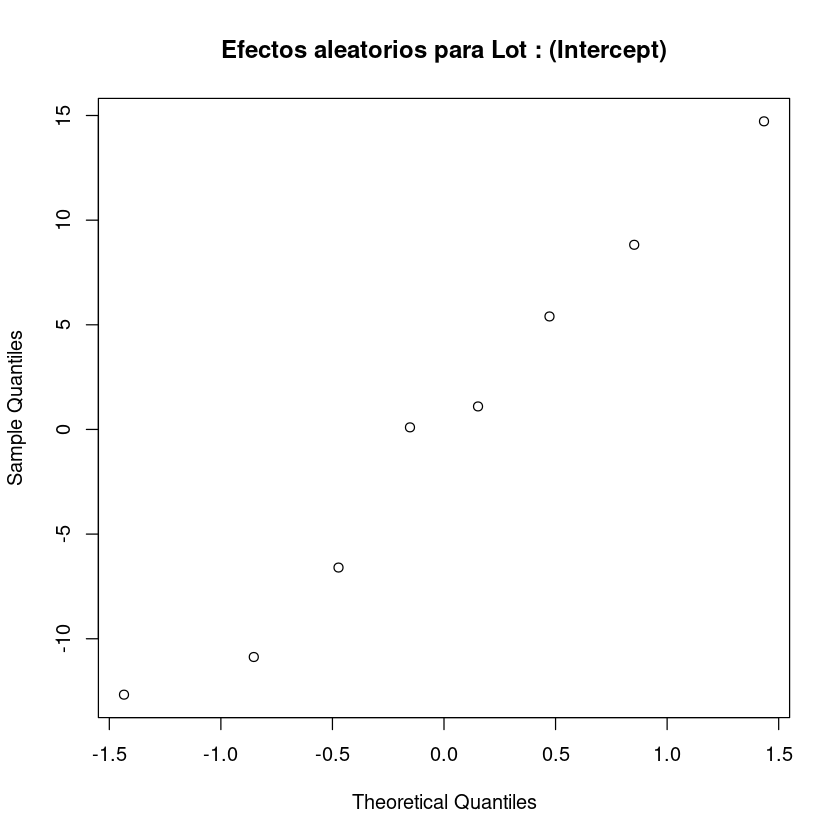

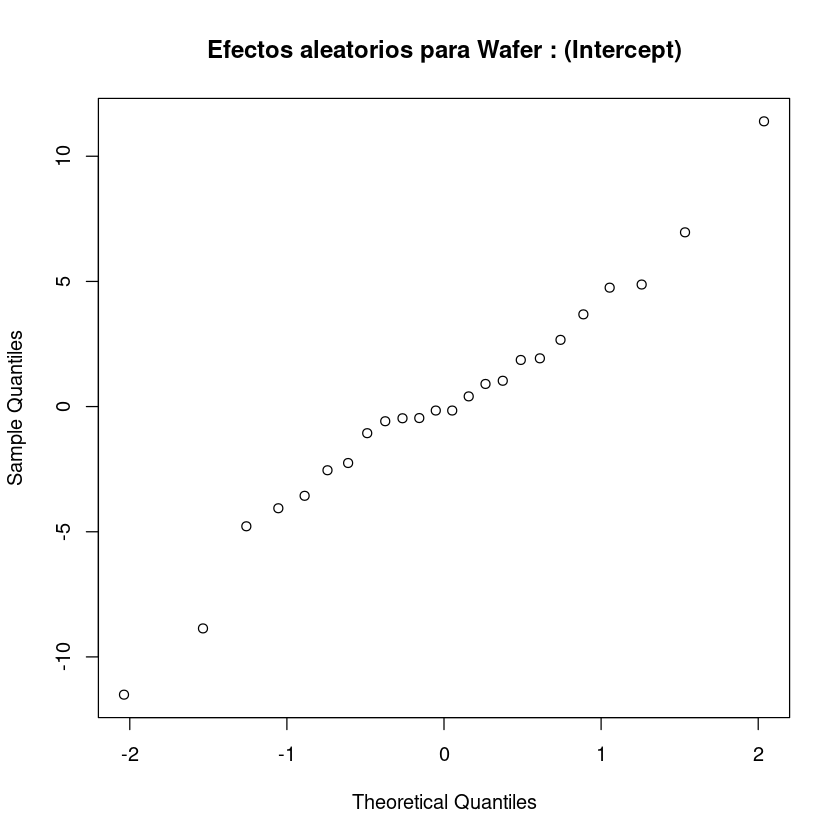

In [13]:
#efectos aleatorios del modelo
random_effects <- ranef(model)

for (term in names(random_effects)) {
  #efectos aleatorios
  effects <- random_effects[[term]]
  
  #gráfico QQ si es vector 
  if (is.vector(effects)) {
    qqnorm(effects, main = paste("Efectos aleatorios para", term))
  } else {
    #gráfico QQ para cada columna
    for (col in colnames(effects)) {
      qqnorm(effects[, col], main = paste("Efectos aleatorios para", term, ":", col))
    }
  }
}

In [10]:
#suponiendo Wafer como efecto aleatorio
model2 <- lme(Thickness ~ Source + Site, random = ~ 1 | Wafer, data = Oxide)

In [11]:
#Comparar
anova(model, model2)

,call,Model,df,AIC,BIC,logLik,Test,L.Ratio,p-value
,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<dbl>,<dbl>
model,"lme.formula(fixed = Thickness ~ Source + Site, data = Oxide, random = ~1 | Lot/Wafer)",1,7,455.7619,471.2985,-220.8810,,NA,NA
model2,"lme.formula(fixed = Thickness ~ Source + Site, data = Oxide, random = ~1 | Wafer)",2,6,554.7459,568.0629,-271.3729,1 vs 2,100.9839,9.273318e-24


In [12]:
#intervalos de confianza de los parámetros al 99%
intervals(model, level = 0.99)

Approximate 99% confidence intervals

 Fixed effects:
                  lower         est.       upper
(Intercept) 1979.325947 1994.9166667 2010.507386
Source2      -20.177583   10.0833333   40.344250
Site2         -3.022988   -0.2500000    2.522988
Site3         -1.939655    0.8333333    3.606321

 Random Effects:
  Level: Lot 
                   lower     est.    upper
sd((Intercept)) 4.784201 10.94954 25.06008
  Level: Wafer 
                   lower     est.    upper
sd((Intercept)) 3.590726 5.982932 9.968868

 Within-group standard error:
   lower     est.    upper 
2.732989 3.574940 4.676271 